In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 


In [18]:
mass=pd.read_csv('Mptab.dat', header=None)
radius=pd.read_csv('Rptab.dat', header=None)
masses=mass.values
radii=radius.values

headers = ['teff', 'logg', 'feh', 'mstar', 'rstar', 'age', 'log10(luminosity)', 'dist', 'av_0']
isochrones = pd.read_csv('../dartmouth_isochrones/post.dat', sep='\t', header=None)
isochrones.columns=headers


isochrones

,teff,logg,feh,mstar,rstar,age,log10(luminosity),dist,av_0
0,5559.879921,4.504318,0.056227,0.954981,0.905466,9.589641,-0.152803,353.930241,0.266691
1,5559.879921,4.504318,0.056227,0.954981,0.905466,9.589641,-0.152803,353.930241,0.266691
2,5454.430485,4.495238,0.063247,0.918684,0.897425,9.777267,-0.193705,352.840074,0.284648
3,5454.766922,4.494862,0.062813,0.918534,0.897740,9.779264,-0.193301,352.862967,0.287549
4,5454.766922,4.494862,0.062813,0.918534,0.897740,9.779264,-0.193301,352.862967,0.287549
...,...,...,...,...,...,...,...,...,...
179995,5717.902949,4.468375,0.143187,1.017394,0.974071,9.516532,-0.040657,351.048374,0.732617
179996,5717.902949,4.468375,0.143187,1.017394,0.974071,9.516532,-0.040657,351.048374,0.732617
179997,5717.902949,4.468375,0.143187,1.017394,0.974071,9.516532,-0.040657,351.048374,0.732617
179998,5782.958457,4.382974,0.176975,1.034145,1.083522,9.734210,0.071443,351.109487,0.981028


In [3]:
star_masses = isochrones['mstar']
med_star_mass = np.median(star_masses)

star_radii = isochrones['rstar']
med_star_radius = np.median(star_radii)

In [20]:
np.median(star_radii)

0.9496963820287461

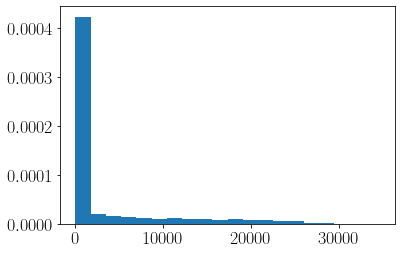

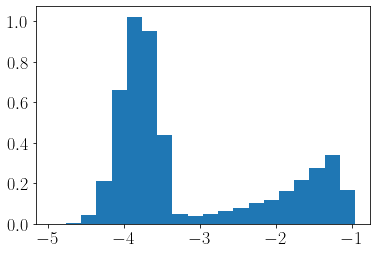

In [4]:
earth_mass = 5.9722E24 #kg
solar_mass = 1.98847E30 #kg

earth_to_star = earth_mass/(solar_mass*med_star_mass)


plt.hist(masses, density=True, bins=20)
plt.show()



plt.hist(np.log10(masses*earth_to_star), density=True, bins=20)
plt.show()

#### distribution is bimodal, lets only keep "planet-like" solutions by removing anything with log10(mp/m*) > -2.25

In [5]:
planet_masses = []
for a_mass in masses:
    if np.log10(a_mass) < 2.25:
        planet_masses.append(a_mass)
        
planet_masses = np.array(planet_masses)   


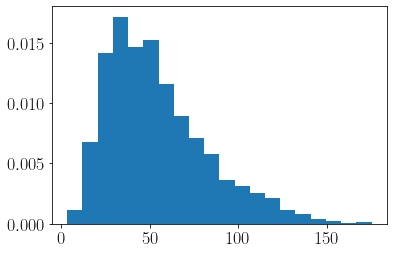

48.3758521893109
28.45763471800848


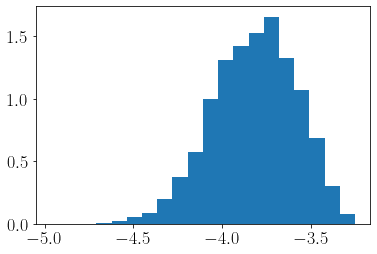

-3.812290005944631
0.2358407830779341


In [6]:

plt.hist(planet_masses, density=True, bins=20)
plt.show()
print(np.median(planet_masses))
print(np.std(planet_masses))


plt.hist(np.log10(planet_masses*earth_to_star), density=True, bins=20)
plt.show()

print(np.median(np.log10(planet_masses*earth_to_star)))
print(np.std(np.log10(planet_masses*earth_to_star)))

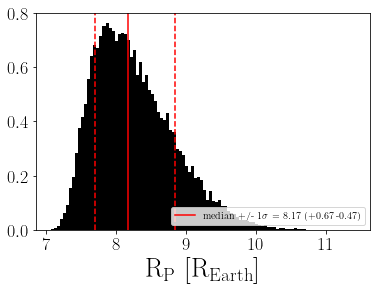

8.170205276518438
0    0.572142
dtype: float64


In [7]:
plt.hist(radius, density=True, bins=100, color='k')
plt.axvline(np.median(radius), 0, 1, color='r', 
            label = r'median +/- 1$\sigma$ = ' + 
            str(np.round(np.median(radius),2)) + ' (+' + 
            str(np.round(np.quantile(radius, 0.84) - np.median(radius),2)) + ' -' +
            str(np.round(np.median(radius) - np.quantile(radius, 0.16),2)) + ')')
plt.axvline(np.quantile(radius, 0.16), 0, 1, color='r', ls='--', )
plt.axvline(np.quantile(radius, 0.84), 0, 1, color='r', ls='--')
plt.xlabel(r'R$_\mathrm{P}$ [R$_\mathrm{Earth}$]', fontsize=27)
plt.xlabel(r'R$_\mathrm{P}$ [R$_\mathrm{Earth}$]', fontsize=27)


plt.legend(loc=4)
plt.show()

print(np.median(radius))
print(np.std(radius))

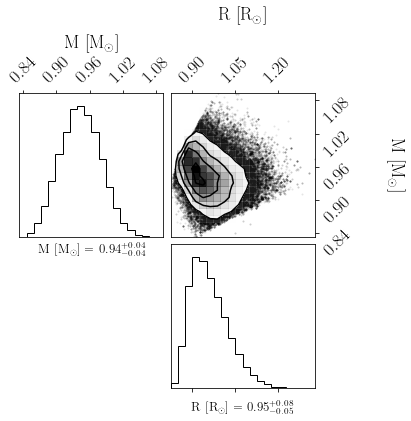

In [8]:
import corner
corner.corner({'radius': star_radii,'mass': star_masses},
               labels = [r'R [R$_\odot$]', r'M [M$_\odot$]'], label_kwargs={'fontsize': 18},
              show_titles=True, title_kwargs={'fontsize': 13}, reverse=True, labelpad=0.2)


plt.savefig('star_corner.pdf')
plt.show()

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/arviz/data/base.py:220: UserWarning: More chains (23943) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


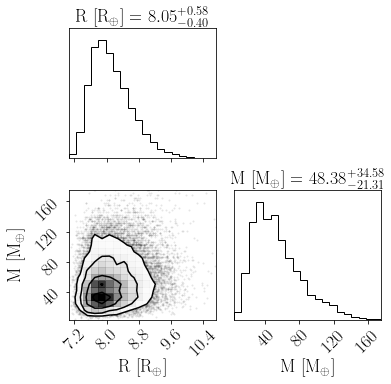

In [12]:
planet_masses = []
planet_radii = []
for ii in range(0, len(masses)):
    a_mass=masses[ii]
    a_radius=radii[ii]
    if np.log10(a_mass) < 2.25:
        planet_masses.append(a_mass)
        planet_radii.append(a_radius)
        
planet_masses = np.array(planet_masses)  
planet_radii = np.array(planet_radii)  


corner.corner({'radius': planet_radii,'mass': planet_masses},
               labels = [r'R [R$_\oplus$]', r'M [M$_\oplus$]'], label_kwargs={'fontsize': 18},
              show_titles=True, title_kwargs={'fontsize': 18})
plt.savefig('planet_corner.pdf')

plt.tight_layout()
plt.show()

In [15]:
np.log10(48.38*earth_to_star/0.94)



-3.7853806241470984

In [13]:
np.quantile(planet_masses*med_star_mass, 0.5)

45.62076496219676

In [17]:
np.median(planet_masses*med_star_mass)

45.62076496219676